<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico </h1>
<h3> Análisis y Visualización de Datos - 2020 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con un estimadores principal: *hf_score* que hace referencia a Human Freedom, que a su vez está calculado en base a dos otros estimadores *ef_score*, para Economic Freedom y *pf_score*, para Personal Freedom. Estos tres estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [0]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

In [185]:
seaborn.__version__

'0.10.1'

Si un archivo está disponible en la web, podemos leerlo con pandas utilizando su URL sin necesidad de descargarlo.

In [186]:
dataset = pandas.read_csv(
    'https://object.cato.org/sites/cato.org/files/human-freedom-index-files/human-freedom-index-2019.csv')
dataset.shape

(1620, 120)

In [187]:
dataset.columns  # Way too many columns!

Index(['year', 'ISO_code', 'countries', 'region', 'hf_score', 'hf_rank',
       'hf_quartile', 'pf_rol_procedural', 'pf_rol_civil', 'pf_rol_criminal',
       ...
       'ef_regulation_business_adm', 'ef_regulation_business_bureaucracy',
       'ef_regulation_business_start', 'ef_regulation_business_bribes',
       'ef_regulation_business_licensing', 'ef_regulation_business_compliance',
       'ef_regulation_business', 'ef_regulation', 'ef_score', 'ef_rank'],
      dtype='object', length=120)

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [0]:
score_cols = [col for col in dataset.columns if 'pf_identity' in col] + [
    'pf_score', # Personal Freedom (score)
    'pf_rank', # Personal Freedom (rank)
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

important_cols = ['year', 'ISO_code', 'countries', 'region'] + score_cols

In [189]:
dataset[important_cols]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
0,2017,ALB,Albania,Eastern Europe,0,10,10,10,7.5,5.8,8.01,46,7.67,30,7.84,38
1,2017,DZA,Algeria,Middle East & North Africa,-,0,0,0,0,0,5.2,146,4.77,159,4.99,155
2,2017,AGO,Angola,Sub-Saharan Africa,10,0,0,0,5,5,5.98,121,4.83,158,5.4,151
3,2017,ARG,Argentina,Latin America & the Caribbean,10,10,10,10,10,10,8.04,41,5.67,147,6.86,77
4,2017,ARM,Armenia,Caucasus & Central Asia,7,10,10,10,7.5,8.2,7.15,72,7.7,27,7.42,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,2008,AUS,Australia,Oceania,-,10,10,10,10,10,9.29,7,8.18,6,8.73,4
1616,2008,DNK,Denmark,Western Europe,-,10,10,10,10,10,9.49,3,7.98,9,8.73,4
1617,2008,CHE,Switzerland,Western Europe,-,10,10,10,10,10,9.31,6,8.35,4,8.83,3
1618,2008,NZL,New Zealand,Oceania,-,10,10,10,10,10,9.42,4,8.46,3,8.94,2


Si analizamos los tipos, vemos que casi todas las columnas se leen como objetos debido a que los valores nulos están marcados con `-`. Los vamos a eliminar y volveremos a convertir las columnas con puntajes a tipo numérico.

In [190]:
dataset.dtypes

year                                  int64
ISO_code                             object
countries                            object
region                               object
hf_score                             object
                                      ...  
ef_regulation_business_compliance    object
ef_regulation_business               object
ef_regulation                        object
ef_score                             object
ef_rank                              object
Length: 120, dtype: object

In [191]:
dataset = dataset[important_cols].replace('-', numpy.nan)
for score_col in score_cols:
  dataset[score_col] = pandas.to_numeric(dataset[score_col])
dataset

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
0,2017,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,7.5,5.8,8.01,46.0,7.67,30.0,7.84,38.0
1,2017,DZA,Algeria,Middle East & North Africa,NaN,0.0,0.0,0.0,0.0,0.0,5.20,146.0,4.77,159.0,4.99,155.0
2,2017,AGO,Angola,Sub-Saharan Africa,10.0,0.0,0.0,0.0,5.0,5.0,5.98,121.0,4.83,158.0,5.40,151.0
3,2017,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,8.04,41.0,5.67,147.0,6.86,77.0
4,2017,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,7.5,8.2,7.15,72.0,7.70,27.0,7.42,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,2008,AUS,Australia,Oceania,NaN,10.0,10.0,10.0,10.0,10.0,9.29,7.0,8.18,6.0,8.73,4.0
1616,2008,DNK,Denmark,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,9.49,3.0,7.98,9.0,8.73,4.0
1617,2008,CHE,Switzerland,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,9.31,6.0,8.35,4.0,8.83,3.0
1618,2008,NZL,New Zealand,Oceania,NaN,10.0,10.0,10.0,10.0,10.0,9.42,4.0,8.46,3.0,8.94,2.0


# Parte 1

Luego de las clases del primer fin de semana, ya tenemos las herramientas para responder las siguientes preguntas:

## 1. Estadísticos descriptivos

### 1.1 Para comenzar con un pantallazo de los datos, calcular el rango de las variables.

  

In [192]:
# TIPOS DE DATOS
world=dataset
print ("TIPOS DE DATOS:\n")
print (world.dtypes)


TIPOS DE DATOS:

year                        int64
ISO_code                   object
countries                  object
region                     object
pf_identity_legal         float64
pf_identity_sex_male      float64
pf_identity_sex_female    float64
pf_identity_sex           float64
pf_identity_divorce       float64
pf_identity               float64
pf_score                  float64
pf_rank                   float64
ef_score                  float64
ef_rank                   float64
hf_score                  float64
hf_rank                   float64
dtype: object


In [193]:
print ("RANGO DE LAS VARIABLES:\n\n")
print ("YEAR:\n", world.year.unique(),"\n")
print ("REGION:\n", world.region.unique(),"\n")
print ("ISO_CODE:\n", world.ISO_code.unique(),"\n")
print ("COUNTRIES:\n", world.countries.unique(),"\n")


RANGO DE LAS VARIABLES:


YEAR:
 [2017 2016 2015 2014 2013 2012 2011 2010 2009 2008] 

REGION:
 ['Eastern Europe' 'Middle East & North Africa' 'Sub-Saharan Africa'
 'Latin America & the Caribbean' 'Caucasus & Central Asia' 'Oceania'
 'Western Europe' 'South Asia' 'North America' 'East Asia'] 

ISO_CODE:
 ['ALB' 'DZA' 'AGO' 'ARG' 'ARM' 'AUS' 'AUT' 'AZE' 'BHS' 'BHR' 'BGD' 'BRD'
 'BLR' 'BEL' 'BLZ' 'BEN' 'BTN' 'BOL' 'BIH' 'BWA' 'BRA' 'BRN' 'BGR' 'BFA'
 'BDI' 'KHM' 'CMR' 'CAN' 'CPV' 'CAF' 'TCD' 'CHL' 'CHN' 'COL' 'COD' 'COG'
 'CRI' 'CIV' 'HRV' 'CYP' 'CZE' 'DNK' 'DOM' 'ECU' 'EGY' 'SLV' 'EST' 'SWZ'
 'ETH' 'FJI' 'FIN' 'FRA' 'GAB' 'GMB' 'GEO' 'DEU' 'GHA' 'GRC' 'GTM' 'GIN'
 'GNB' 'GUY' 'HTI' 'HND' 'HKG' 'HUN' 'ISL' 'IND' 'IDN' 'IRN' 'IRQ' 'IRL'
 'ISR' 'ITA' 'JAM' 'JPN' 'JOR' 'KAZ' 'KEN' 'KOR' 'KWT' 'KGZ' 'LAO' 'LVA'
 'LBN' 'LSO' 'LBR' 'LBY' 'LTU' 'LUX' 'MDG' 'MWI' 'MYS' 'MLI' 'MLT' 'MRT'
 'MUS' 'MEX' 'MDA' 'MNG' 'MNE' 'MAR' 'MOZ' 'MMR' 'NAM' 'NPL' 'NLD' 'NZL'
 'NIC' 'NER' 'NGA' 'MKD' 'NOR' 'OMN' 

In [194]:
# VARIABLES NUMÉRICAS
num_rows=world.shape[0]
print ( "A continuación se muestran los valores máximos, mínimos y rangos de las variables numéricas:")
for col_name in score_cols:
    print ('{: <25}'.format(col_name.upper()),
           "MIN = {:6.2f}".format(world[col_name].min())," ",
           "MAX = {:6.2f}".format(world[col_name].max())," "
          )

A continuación se muestran los valores máximos, mínimos y rangos de las variables numéricas:
PF_IDENTITY_LEGAL         MIN =   0.00   MAX =  10.00  
PF_IDENTITY_SEX_MALE      MIN =   0.00   MAX =  10.00  
PF_IDENTITY_SEX_FEMALE    MIN =   0.00   MAX =  10.00  
PF_IDENTITY_SEX           MIN =   0.00   MAX =  10.00  
PF_IDENTITY_DIVORCE       MIN =   0.00   MAX =  10.00  
PF_IDENTITY               MIN =   0.00   MAX =  10.00  
PF_SCORE                  MIN =   2.22   MAX =   9.56  
PF_RANK                   MIN =   1.00   MAX = 162.00  
EF_SCORE                  MIN =   2.58   MAX =   9.11  
EF_RANK                   MIN =   1.00   MAX = 162.00  
HF_SCORE                  MIN =   3.69   MAX =   9.12  
HF_RANK                   MIN =   1.00   MAX = 162.00  


 ### 1.2 Para cada país, tenemos varias realizaciones para cada variable *pf_identity* y *hf_score*. Si queremos comparar un país con otro, ¿cuál es la manera adecuada de hacerlo? Por ejemplo, ¿nos quedamos con un único valor? ¿o comparamos todos los valores? ¿usamos el promedio? ¿usamos la mediana? 

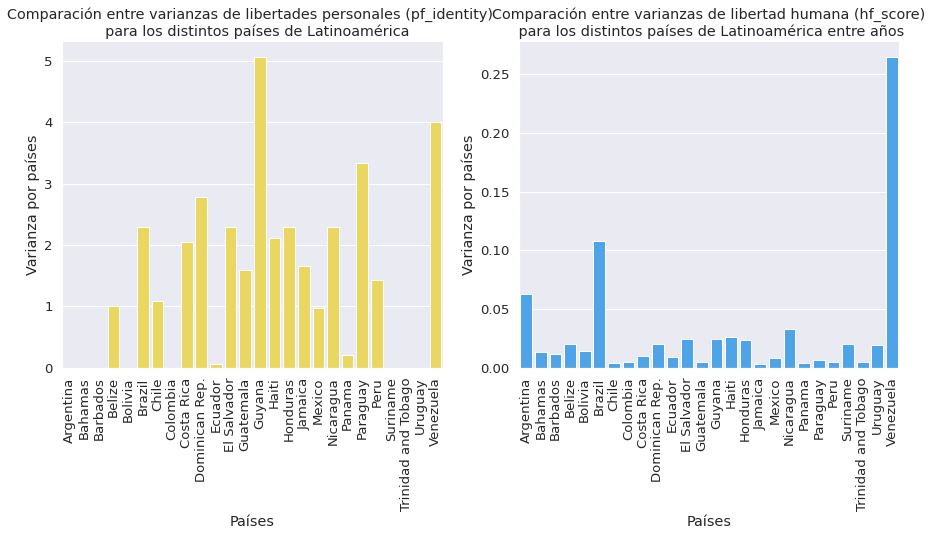

In [195]:
# Para iniciar el análisis, elegimos una región con muchos países. 
# Comparamos la varianza por año de las variables, entre los distintos países de esa región.

BLUE = '#35A7FF'
RED = '#FF5964'
GREEN = '#6BF178'
YELLOW = '#FFE74C'
seaborn.set(font_scale=1.2) 

dataset_latamYCaribe = dataset[dataset.region == 'Latin America & the Caribbean']

plt.figure(figsize=(15,6))
plt.subplot(1,2,1),seaborn.barplot(data=dataset_latamYCaribe, 
                x='countries', y='pf_identity',
                ci=None,
                color=YELLOW,
                estimator=numpy.var,
                )
    
plt.xticks(rotation=45)
plt.ylabel('Varianza por países')
plt.xlabel('Países')
plt.title('Comparación entre varianzas de libertades personales (pf_identity) \n  para los distintos países de Latinoamérica')
plt.xticks(rotation=90)

plt.subplot(1,2,2),seaborn.barplot(data=dataset_latamYCaribe,
                x='countries', y='hf_score',
                ci=None,
                color=BLUE,
                estimator=numpy.var,
                )
    
plt.xticks(rotation=45)
plt.ylabel('Varianza por países')
plt.xlabel('Países')
plt.title('Comparación entre varianzas de libertad humana (hf_score)\n para los distintos países de Latinoamérica entre años')
plt.xticks(rotation=90)

seaborn.despine()

OBSERVACIONES: Se puede notar que algunos países presentan mayor varianza en sus datos a lo largo de los años, respecto de otros. 

APROXIMACIÓN: Se podría decir que los países que tienen mínima varianza pueden ser comparados con un único valor (realizar el análisis en un solo año). Por otro lado, para los que tienen mayor varianza, sería necesario utilizar más datos en la comparación, así como también tener en consideración más cantidad de años ya que al presentar mucha varianza, realizar el análisis en un solo año no sería representativo de la distribución del total de los datos para ese país.


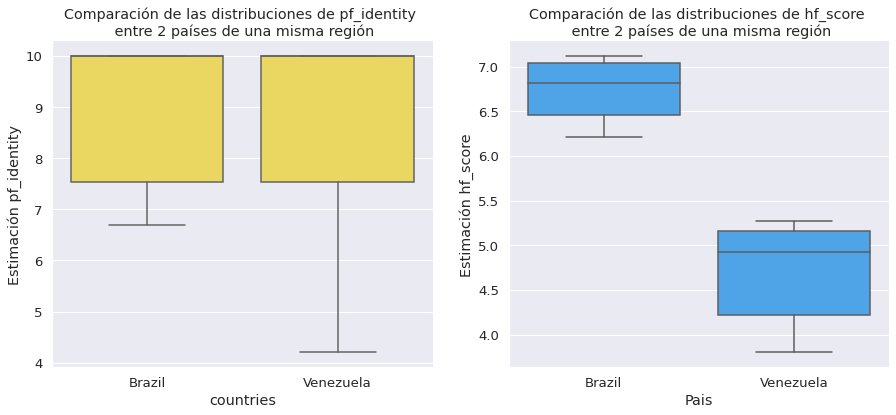

In [196]:
# Elegimos 2 países y realizamos un estudio general de sus datos.
# Comparación de hf_score y pf_ identity entre países de una misma región
dat = dataset_latamYCaribe[(dataset_latamYCaribe.countries== "Venezuela") | (dataset_latamYCaribe.countries=="Brazil")]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1),seaborn.boxplot(data=dat, x='countries', y='pf_identity', color=YELLOW)
plt.ylabel('Estimación pf_identity')
plt.title('Comparación de las distribuciones de pf_identity \n entre 2 países de una misma región')

plt.subplot(1,2,2),seaborn.boxplot(data=dat, x='countries', y='hf_score', color=BLUE)
plt.ylabel('Estimación hf_score')
plt.xlabel('Pais')
plt.title('Comparación de las distribuciones de hf_score \n entre 2 países de una misma región')
seaborn.set(font_scale=1.2) 

seaborn.despine()

CONCLUSIÓN: Como los datos entre los diferentes países pueden ser muy variados, es más acertado elegir la mediana antes que la media, como representación de una tendencia central de la distribución de los datos. 


Realizando un gráfico de cajas entre dos países con mucha varianza en sus datos, podemos apreciar la información que obviamos al utilizar un único valor (mediana).

### 1.3 Obtener media, mediana y desviación estándar de las variables pf_identity y hf_score en el mundo y compararla con la de Latinoamérica y el caribe. Usar la respuesta del punto anterior para justificar si la comparación es válida o no.





In [197]:
ds_global=dataset.describe()[["pf_identity", "hf_score"]]
ds_global["area"]='Global'

ds_latin_caribe=dataset_latamYCaribe.describe()[["pf_identity", "hf_score"]]
ds_latin_caribe["area"]='Latam & C'

ds_group=pandas.concat([ds_global, ds_latin_caribe]).reset_index()
ds_group.columns=['stat','pf_identity','hf_score','area']
ds_group.stat.replace('50%', 'median', inplace=True)
ds_group=ds_group[ds_group.stat.isin(["mean","median","std"])]
ds_group.set_index(['stat','area']).sort_values(by=['stat']).round(2)

pf_identity  hf_score
stat   area                            
mean   Global            7.28      6.98
       Latam & C         8.58      7.04
median Global            8.80      6.90
       Latam & C        10.00      7.02
std    Global            3.18      1.06
       Latam & C         1.88      0.63

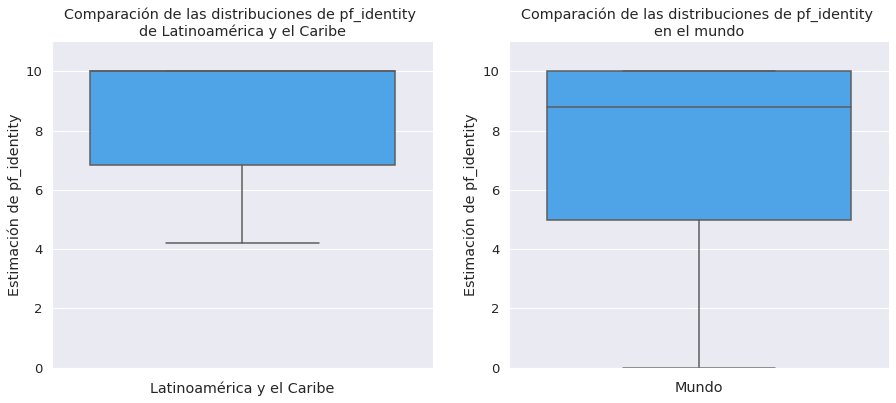

In [198]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
seaborn.boxplot(data=dataset_latamYCaribe, y='pf_identity', color=BLUE)
plt.ylabel('Estimación de pf_identity') 
plt.title('Comparación de las distribuciones de pf_identity \nde Latinoamérica y el Caribe')
plt.xticks(rotation=90)
plt.xlabel('Latinoamérica y el Caribe')
plt.ylim([0,11])

plt.subplot(1,2,2)
plt.ylim([0,11])
seaborn.boxplot(data=dataset, y='pf_identity', color=BLUE)
plt.ylabel('Estimación de pf_identity') 
plt.xlabel('Mundo')
plt.title('Comparación de las distribuciones de pf_identity \nen el mundo')
plt.xticks(rotation=90)
seaborn.despine()

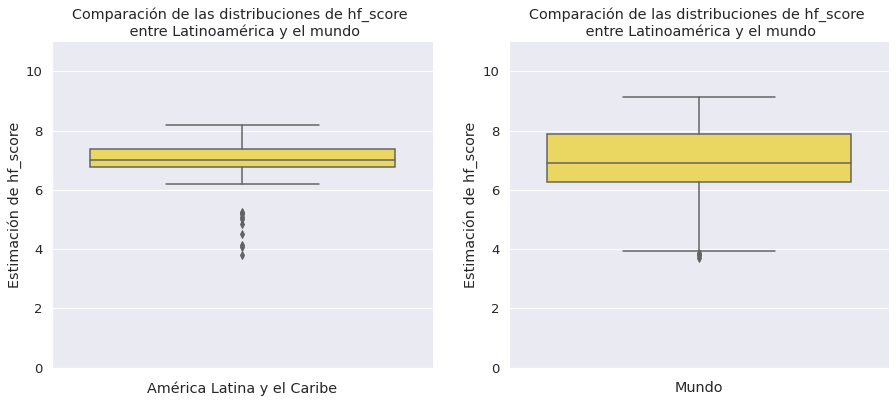

In [199]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
seaborn.boxplot(data=dataset_latamYCaribe, y='hf_score', color=YELLOW)
plt.ylabel('Estimación de hf_score') 
plt.title('Comparación de las distribuciones de hf_score \n entre Latinoamérica y el mundo')
plt.xlabel('América Latina y el Caribe')
plt.xticks(rotation=90)
plt.ylim([0,11])

plt.subplot(1,2,2)
plt.ylim([0,11])
seaborn.boxplot(data=dataset, y='hf_score', color=YELLOW)
plt.ylabel('Estimación de hf_score') 
plt.xlabel('Mundo')
plt.title('Comparación de las distribuciones de hf_score \n entre Latinoamérica y el mundo')
plt.xticks(rotation=90)
seaborn.despine()

OBSERVACIONES: Podemos observar que, en el caso de hf_score, la media y la mediana son muy similares. Por eso, y basados en el análisis del punto anterior, podemos deducir que en el caso de hf_score, es indiferente qué métrica se utiliza en la comparación, media mediana o caso puntual. 

Como en el caso de pf_identity hay mucha desviación estandar, basados en las conclusiones del punto anterior, decidimos utilizar un gráfico de cajas para poder comparar el conjunto de datos sin obviar las variaciones.

CONCLUSIÓN: Podemos observar que las desviaciones son muy distintas para las distintas variables, lo cual se ve reflejado en los valores de las medias y mediana: son similares para hf_score y toman valores muy diferentes para "pf_identity", lo cual concuerda con lo propuesto en el punto anterior: dadas las distintas posibles distribuciones de los datos, guiarnos por la mediana ya que la media puede variar mucho.

Por otro lado, al comparar los parámetros mundiales con los de una región, podría ser válida para el caso en que quisieramos ubicar a esta región en alguna clasificación que indique el desarrollo, por ejemplo, "región desarrollada" las que quedan por encima de la mediana global.

### 1.4 ¿Tiene sentido calcular la moda?


Se concluyó que al trabajar con datos decimales, no sería muy eficiente utilizar la moda como representación, debido a que los mismos no se repiten y, en el caso de que sí lo hagan, no sería con demasiada frecuencia.

En este caso la forma en que la moda sería representativa es generando rangos que agrupen muchos valores.

### 1.5 ¿Cómo pueden sanearse los valores faltantes?

In [200]:
# Primero imprimimos la cantidad de valores faltantes para cada variable
dataset.isna().sum()

year                         0
ISO_code                     0
countries                    0
region                       0
pf_identity_legal         1312
pf_identity_sex_male        83
pf_identity_sex_female      80
pf_identity_sex             80
pf_identity_divorce        101
pf_identity                 80
pf_score                    80
pf_rank                     80
ef_score                    80
ef_rank                     80
hf_score                    80
hf_rank                     80
dtype: int64

Para valores faltantes, lo mejor es quitarlos del estudio; es decir no reemplazarlos por ceros ni ningún otro valor, ya que modificaríamos los indicadores de ese país.

Una posible solución es utilizar la función dropna(). Ésta logra eliminar una fila completa en el caso de valores faltantes, o una columna completa.

*Otra* solución más atómica sería reemplazar dichos valores por un valor nulo = 0

In [201]:
#Reemplazando NaN con mediana de cada país
"""
paises=dataset.countries.unique()
for pais in paises:
  dataset.pf_identity.fillna(dataset[dataset.countries==pais].pf_identity.median(),inplace=True)
  dataset.hf_score.fillna(dataset[dataset.countries==pais].hf_score.median()#,inplace=True)
  print('Pais:'+pais+' - pf:'+str(dataset[dataset.countries==pais].pf_identity.median())+' - hf:'+str(dataset[dataset.countries==pais].hf_score.median()))
dataset[dataset.countries=='Sudan']
"""

"\npaises=dataset.countries.unique()\nfor pais in paises:\n  dataset.pf_identity.fillna(dataset[dataset.countries==pais].pf_identity.median(),inplace=True)\n  dataset.hf_score.fillna(dataset[dataset.countries==pais].hf_score.median()#,inplace=True)\n  print('Pais:'+pais+' - pf:'+str(dataset[dataset.countries==pais].pf_identity.median())+' - hf:'+str(dataset[dataset.countries==pais].hf_score.median()))\ndataset[dataset.countries=='Sudan']\n"

Al eliminar las filas que poseen un NaN para las columnas hf_score, pf_score y pf_identity, el resultado de la media y la mediana global no varía y por lo tanto no cosideraremos los valores nulos en esta columna.

Sin embargo, los mismos se podrían sanear utilizando algún estadístico como la media o la mediana de la columna a la que pertenece el valor nulo o también con el promedio de su país.

### 1.6 ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? Los outliers, ¿son globales o por grupo? ¿Los eliminaría del conjunto de datos?


In [202]:
# Deseamos comparar resultados globales y regionales para obtener conclusiones sobre esto.
# Obtención de la Desviación Estándar
desviacion_region=dataset.groupby(["region"]).std()[['pf_identity', 'hf_score']]
desviacion_region

,pf_identity,hf_score
region,,
Caucasus & Central Asia,1.420983,0.611003
East Asia,0.502322,0.920982
Eastern Europe,0.845850,0.575123
Latin America & the Caribbean,1.875832,0.634897
Middle East & North Africa,3.107285,0.931195
North America,0.444262,0.158377
Oceania,1.231986,0.931537
South Asia,3.199854,0.671944
Sub-Saharan Africa,2.673227,0.695027


En el caso de querer eliminar los outliers, podríamos utilizar esta función, que descarta los valores que se encuentran a dos veces el desvío estándar de la media.

Incluímos un histograma para mostrar el efecto de remover los valores extremos.

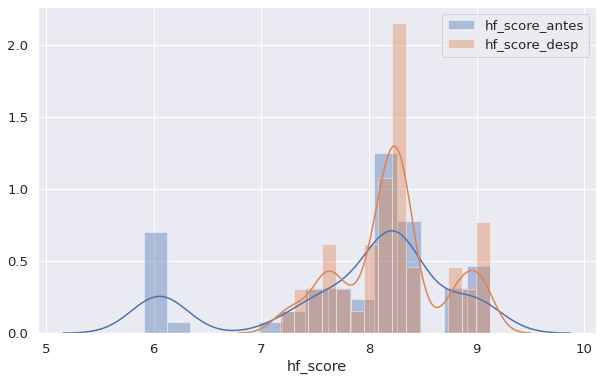

In [203]:
def clean_outliers(dataset, column_name):
    """Devuelve el dataset sin las filas con outliers en cada columna."""
    interesting_col = dataset[column_name]
    # Aquí tomamos un rango de dos sigmas a ambos lados de la media para detectar outliers.
    outlier = ( numpy.abs(interesting_col - interesting_col.median()) <= (2 * interesting_col.std()))
    return dataset[outlier]
datos_filtrados = clean_outliers(dataset[dataset.region=='East Asia'],'hf_score')

# Se elige una región para ejempliplificar
# Comparación de hf_score antes y despues del limpiar outliers
plt.figure(figsize=(10,6))
seaborn.distplot( dataset.hf_score[dataset.region == 'East Asia'], label='hf_score_antes', kde=True, bins=15)
seaborn.distplot( datos_filtrados.hf_score, label='hf_score_desp', kde=True, bins=15)
plt.legend() 

Otra opcion es encontrar los outliers basados en los cuartiles. La funcion boxplot de seaborn realiza automaticamente este calculo. Podemos observarlos en el grafico como puntos por afuera de los limites.

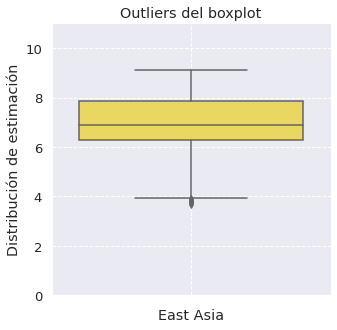

In [204]:
plt.figure(figsize=(5,5))
seaborn.boxplot(data=dataset, y='hf_score', color=YELLOW)
plt.ylabel('Distribución de estimación') 
plt.title('Outliers del boxplot')
plt.xlabel('East Asia')
plt.xticks(rotation=90)
plt.ylim([0,11])
plt.grid(linestyle='--')
seaborn.despine()

OBSERVACIONES: Si se toman outliers globales se podrían estar dejando afuera del análisis regiones enteras que tengan un comportamiento diferente a las regiones en general. Por lo tanto, se concluye que, de eliminarse outliers, se deberían eliminar valores atípicos dentro del conjunto de una región.

Consideramos que en los valores dentro del dataset, al provenir de un análisis previo, no puede haber outliers porque son valores chequeados y dentro de un rango establecido. Al sacarlos estaríamos mostrando una realidad diferente a la del estudio.

## 2. Agregación de datos

### 2.1 Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.

Text(0.5, 1.0, 'Media de pf_identity y hf_score a través de los años en el mundo')

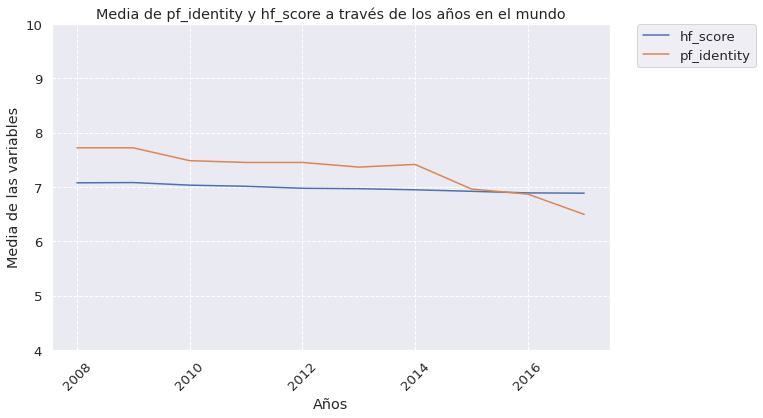

In [205]:
#Gráfico Media de pf_identity y hf_score por año
plt.figure(figsize=(10,6))
seaborn.lineplot(data=dataset, x='year', y='hf_score', ci=None, label='hf_score', estimator=numpy.mean)
seaborn.lineplot(data=dataset, x='year', y='pf_identity', ci=None, label='pf_identity', estimator=numpy.mean)
plt.xticks(rotation=45);
plt.ylabel('Media de las variables')
plt.xlabel('Años')
plt.grid(linestyle='--')
plt.ylim([4,10])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Media de pf_identity y hf_score a través de los años en el mundo")

OBSERVACIÓN: El gráfico da a entender una tendencia descendente para ambas variables pero más abrupta para pf_identity.

### 2.2 Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?

Text(0.5, 1.0, 'Media de hf_score por año agrupando por región')

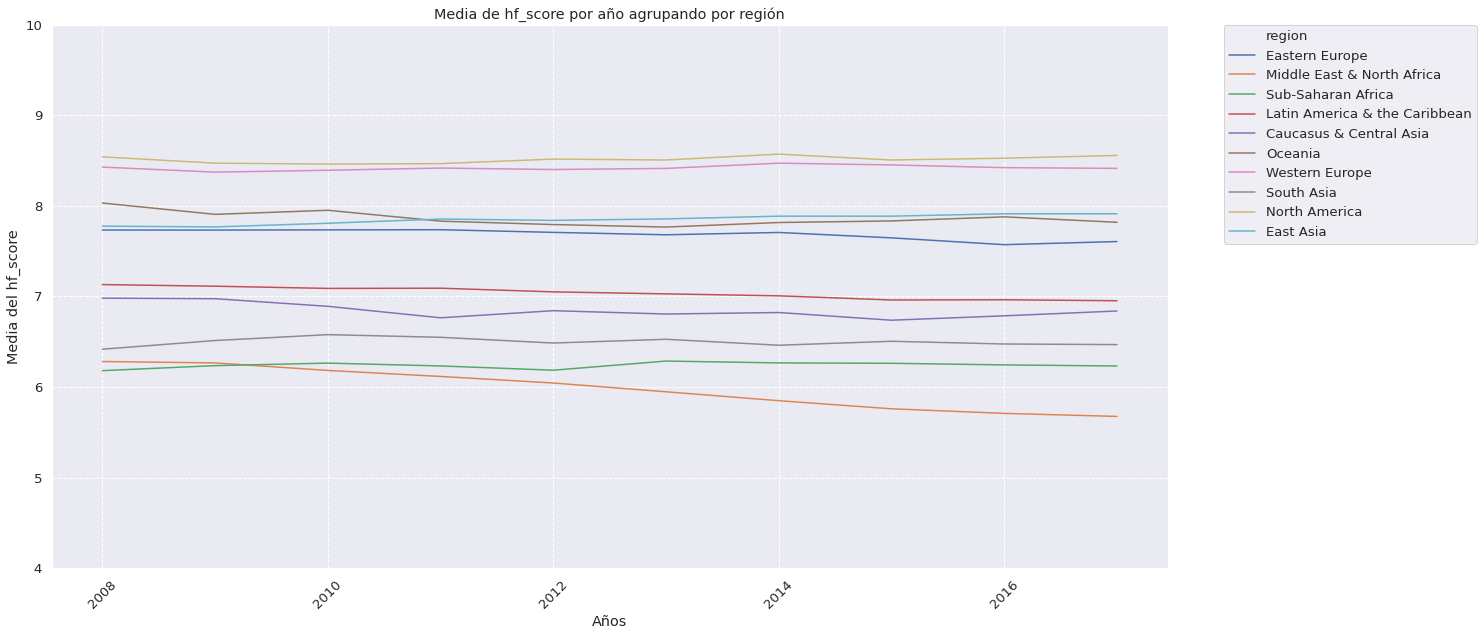

In [206]:
#Gráfico Media hf_score por año agrupando por región
plt.figure(figsize=(20,10))
seaborn.lineplot(data=dataset, x='year', y='hf_score', ci=None, legend='brief', estimator=numpy.mean, hue='region')
plt.xticks(rotation=45);
plt.grid(linestyle='--')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Media del hf_score')
plt.ylim([4,10])
plt.xlabel('Años')
plt.title("Media de hf_score por año agrupando por región") 

OBSERVACIÓN: hf_score mantiene una tendencia muy similar en la mayoría de las regiones, algunas se mantienen y otras son levemente descendientes.

Text(0.5, 1.0, 'Media de pf_identity por año agrupando por región')

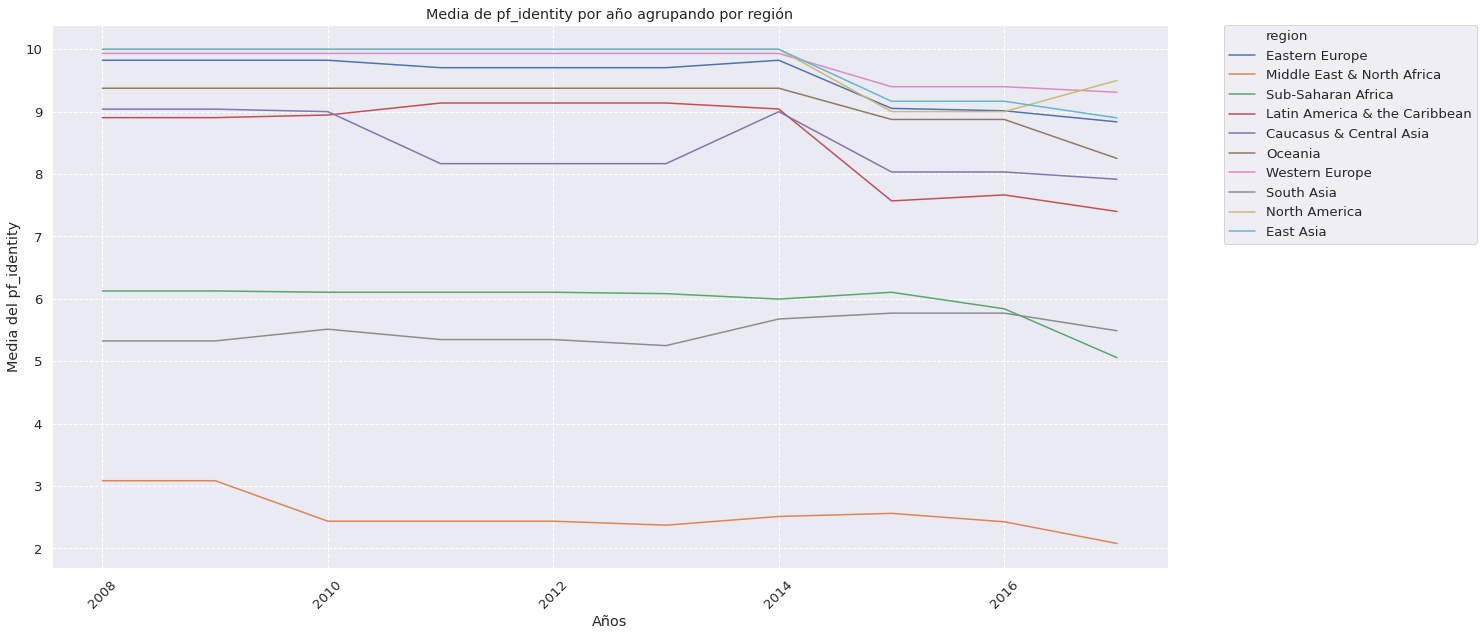

In [207]:
# Gráfico Media pf_identity por año agrupando por región
plt.figure(figsize=(20,10))
seaborn.lineplot(data=dataset, x='year', y='pf_identity', ci=None, legend='brief', estimator=numpy.mean, hue='region')
plt.xticks(rotation=45);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(linestyle='--')
plt.ylabel('Media del pf_identity')
plt.xlabel('Años')
plt.title("Media de pf_identity por año agrupando por región")

OBSERVACIÓN: Los valores para pf_identity muestran una tendencia similar entre las distintas regiones, es decir, se mantienen en un rango reducido y levemente descendiente.

CONCLUSIÓN: Los gráficos regionales muestran las mismas tendencias que la medias de las variables  globales a través de los años.

### 2.3 Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarían los países relevantes a esa tendencia?

Pista: hay gráficos de seaborn que permiten generar visualizaciones para cada valor de una variable categórica, en este caso, las distintas regiones.


Text(0.5, 1.0, 'Mediana de pf_identity en la región de Latinoamerica')

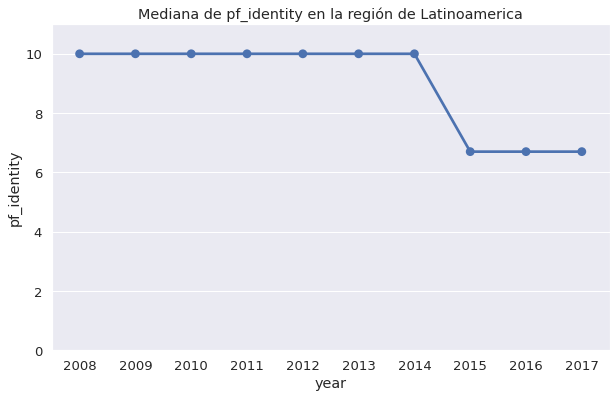

In [208]:
# Para demostrar la tendencia de pf_idenity en la región de Latinoamérica, se graficó la mediana global de dicha región
plt.figure(figsize=(10,6))
seaborn.pointplot(data=dataset_latamYCaribe, x="year", 
                               y="pf_identity", ci=None, legend='brief', estimator=numpy.median)
plt.ylim([0,11])
plt.title("Mediana de pf_identity en la región de Latinoamerica")

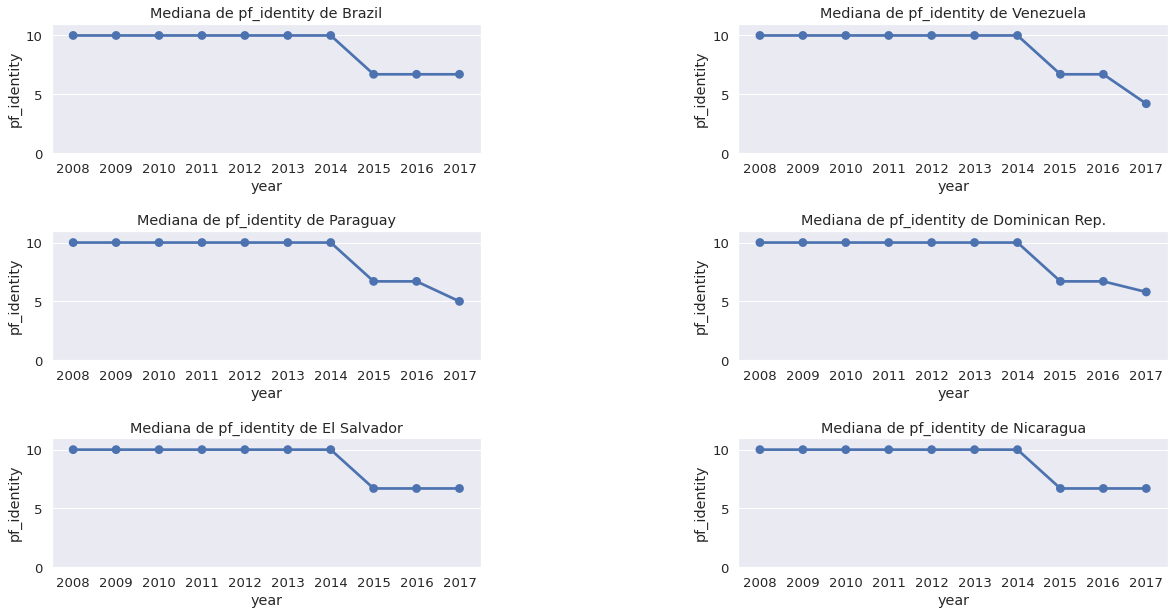

In [209]:
# Para verificar lo anteriormente dicho, se eligieron algunos países pertenecientes a la región que poseían gran varianza
# y para dichos países se graficaron la tendencia de sus medianas que explican la tendencia de la mediana de la región.
countries=["Brazil", "Venezuela", "Paraguay", "Dominican Rep.", "El Salvador", "Nicaragua"]
plt.figure(figsize=(20,10))

i=0
for country in countries:
    i=i+1
    plt.subplot(3, 2, i)
    plt.subplots_adjust(hspace=0.6, wspace=0.6)
    plt.ylim([0,11])
    plt.title("Mediana de pf_identity de " + country)
    seaborn.pointplot(data=dataset_latamYCaribe[dataset_latamYCaribe.countries == country],
                      x="year", y="pf_identity", ci=None, legend='brief', estimator=numpy.median)


OBSERVACIONES: Vemos que en muchos países de la región después del año 2015, cae notablemente la libertad personal. Para elegir los países, nos fijamos en la varianza de los mismos.

Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?



Text(0, 0.5, 'score')

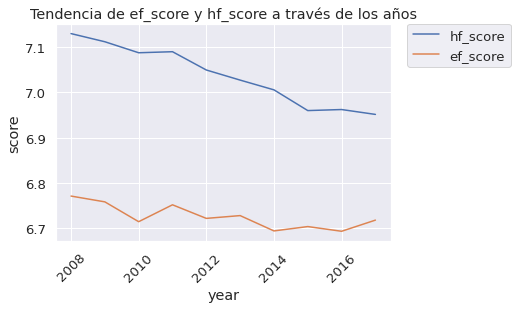

In [210]:
#Gráfico Media de ef_score y hf_score por año

seaborn.lineplot(data=dataset_latamYCaribe, x='year', y='hf_score', ci=None, label='hf_score', estimator=numpy.mean)
seaborn.lineplot(data=dataset_latamYCaribe, x='year', y='ef_score', ci=None, label='ef_score', estimator=numpy.mean)
plt.xticks(rotation=45);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Tendencia de ef_score y hf_score a través de los años")
plt.ylabel("score")

OBSERVACIONES: Al bajar abruptamente el pf_identity, esto afectó directamente al hf_score, ya que el mismo es un promedio de la libertad económica y la libertad personal.


## 3. Distribuciones
  1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos el conjunto de valores disponibles para esa region en estos gráficos?


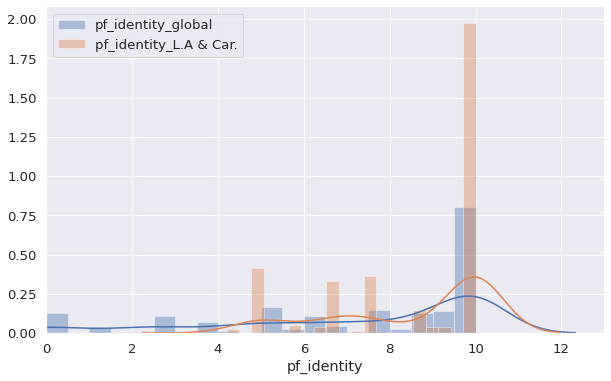

In [211]:
n=20
plt.figure(figsize=(10,6))
seaborn.distplot(
    dataset.pf_identity.dropna(), label='pf_identity_global', bins=n, kde=True)
seaborn.distplot(
    dataset.pf_identity.dropna()[dataset.region == 'Latin America & the Caribbean'],bins=n, label='pf_identity_L.A & Car.', kde=True)
plt.legend()
plt.xlim([0,13])
seaborn.despine()

OBSERVACIONES: Visualmente no podemos distinguir ninguna distribución para la variable pf_identity.

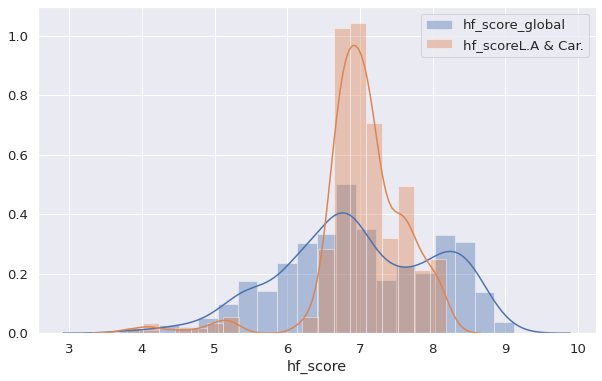

In [212]:
plt.figure(figsize=(10,6))
seaborn.distplot(
    dataset.hf_score, label='hf_score_global', kde=True, bins=n)
seaborn.distplot( 
    dataset.hf_score[dataset.region == 'Latin America & the Caribbean'], label='hf_scoreL.A & Car.', kde=True, bins=n)
plt.legend()

OBSERVACIONES: Visualmente la variable hf_score para Latinoamérica parece una distribución normal, no así hf_score global que parece una distribución bimodal.

## 4. Correlaciones y Relaciones

En este ejercicio queremos responder a las preguntas

* Las libertades personales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, pf_score y ef_score. 

Como pf_identity contribuye al cálculo de pf_score esperamos hallar algún grado de correlación. Lo contrario podría ocurrir con ef_score. 

### 4.1 ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?

In [213]:
data_latinoamerica = dataset_latamYCaribe[['year','countries','pf_identity','pf_score','ef_score']].dropna()
#df.dropna(axis='index')
data_latinoamerica.describe()

,year,pf_identity,pf_score,ef_score
count,258.000000,258.000000,258.000000,258.000000
mean,2012.531008,8.582171,7.348333,6.725271
std,2.866859,1.875832,0.633831,0.896733
min,2008.000000,4.200000,5.030000,2.580000
25%,2010.000000,6.850000,6.932500,6.432500
50%,2013.000000,10.000000,7.290000,6.905000
75%,2015.000000,10.000000,7.770000,7.287500
max,2017.000000,10.000000,8.820000,7.930000


<Figure size 288x216 with 0 Axes>

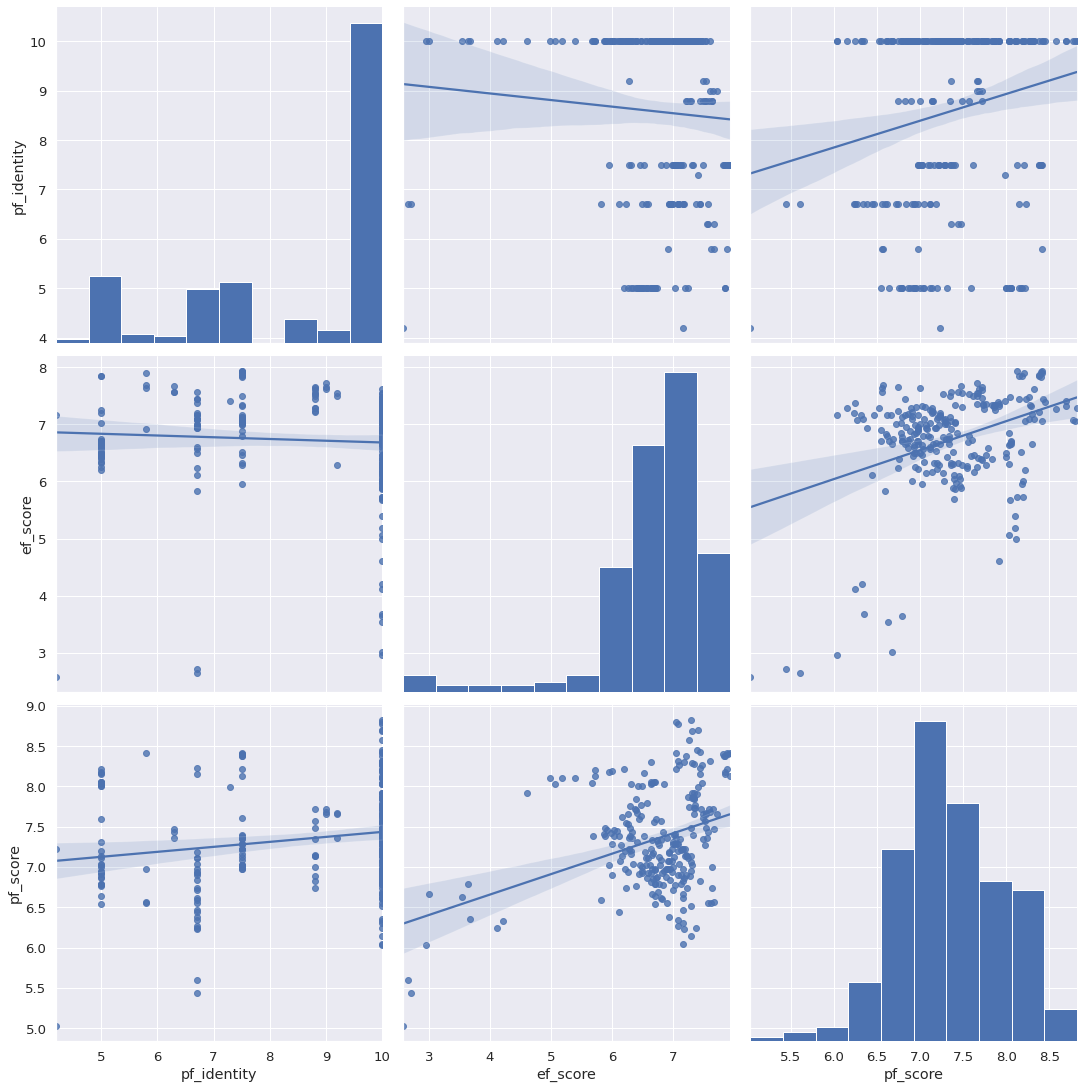

In [214]:
# Gráfico pairplot para las variables pf_identity, pf_score y ef_score.
plt.figure(figsize=(4,3))
seaborn.pairplot(
    data=data_latinoamerica, kind='reg',
    vars=['pf_identity', 'ef_score', 'pf_score'], 
    height=5)

OBSERVACIONES: Visualmente no se puede observar fácilmente una tendencia entre las variables, sobre todo con el pf_identity. No es un gráfico apropiado para pf_identity dado que suele tener valores más discretos.
Podemos ver más relación entre pf_identity y pf_score, al igual que entre pf_score y ef_score.

### 4.2 Graficar la correlación (visual) entre pf_identity y pf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en la práctica, discreta, y eso afecta al tipo de gráfico que podemos usar.

Text(0, 0.5, 'PF_SCORE LATINOAMERICA')

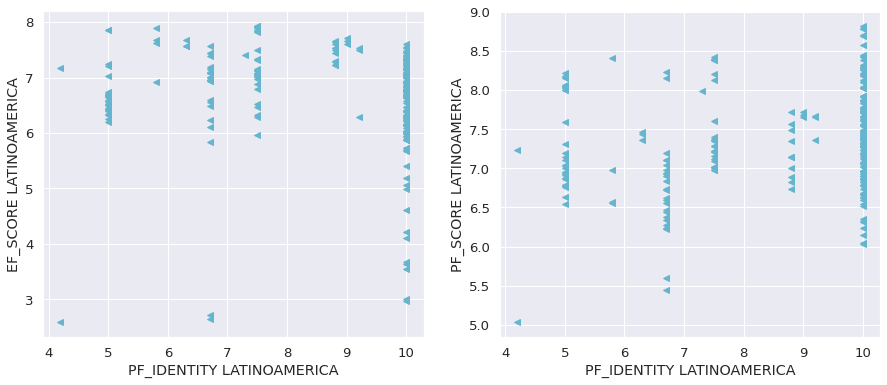

In [215]:
# Gráficos para Latinoamérica
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1),plt.plot(data_latinoamerica["pf_identity"],data_latinoamerica["ef_score"], "c<")
plt.ylabel("EF_SCORE LATINOAMERICA")
plt.xlabel("PF_IDENTITY LATINOAMERICA")
plt.subplot(1,2,2),plt.plot(data_latinoamerica ["pf_identity"],data_latinoamerica ["pf_score"], "c<")
plt.xlabel("PF_IDENTITY LATINOAMERICA")
plt.ylabel("PF_SCORE LATINOAMERICA")

Como respuesta, podría decirse que:
* Según los gráficos, para Latinoamérica, las variables personales y económicas parecen no ir de la mano.
* A continuación analizaremos a nivel país para poder comprender el comportamiento observado anteriormente.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text major ticklabel objects>)

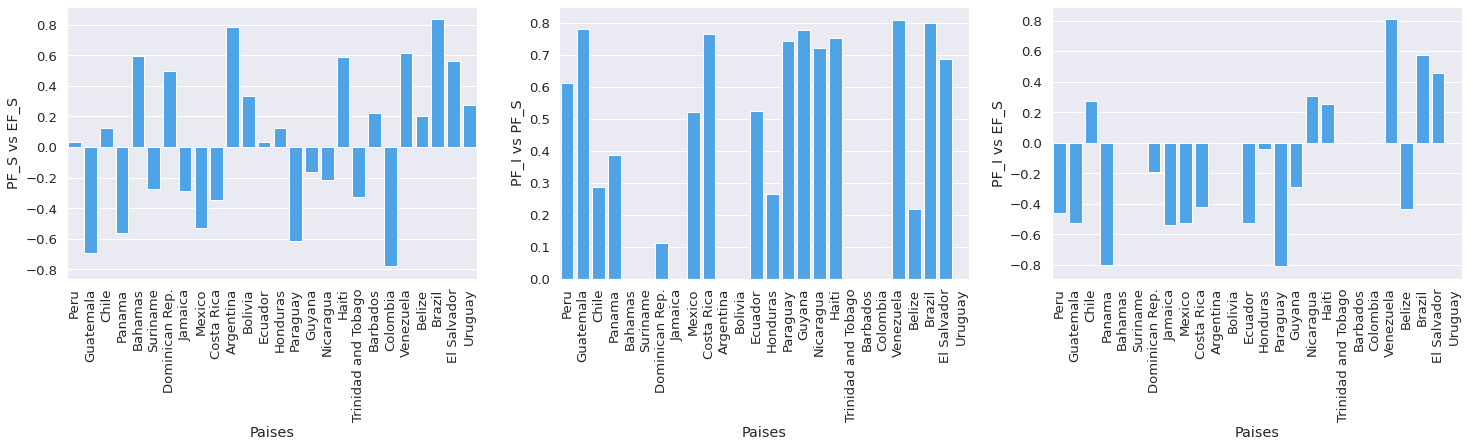

In [216]:
corr_regional = data_latinoamerica[['pf_identity', 'pf_score', 'ef_score', 'countries']]
plt.figure(figsize=(25,5))
plt.subplot(1, 3, 1)
corr = {"Paises":[], "PF_S vs EF_S":[]}
for x in set(corr_regional.countries):
  data_pais = corr_regional[corr_regional.countries==x]
  corr['Paises'].append(x)
  corr['PF_S vs EF_S'].append(data_pais.corr(method="spearman")['ef_score'][1])
df = pandas.DataFrame(corr, columns=['Paises', 'PF_S vs EF_S'])
seaborn.barplot(data=df, x='Paises', y='PF_S vs EF_S', color=BLUE)
plt.xticks(rotation=90)
plt.subplot(1, 3, 2)
corr = {"Paises":[], "PF_I vs PF_S":[]}
for x in set(corr_regional.countries):
  data_pais = corr_regional[corr_regional.countries==x]
  corr['Paises'].append(x)
  corr['PF_I vs PF_S'].append(data_pais.corr(method="spearman")['pf_identity'][1])
df = pandas.DataFrame(corr, columns=['Paises', 'PF_I vs PF_S'])
seaborn.barplot(data=df, x='Paises', y='PF_I vs PF_S', color=BLUE)
plt.xticks(rotation=90)
plt.subplot(1, 3, 3)
corr = {"Paises":[], "PF_I vs EF_S":[]}
for x in set(corr_regional.countries):
  data_pais = corr_regional[corr_regional.countries==x]
  corr['Paises'].append(x)
  corr['PF_I vs EF_S'].append(data_pais.corr(method="spearman")['pf_identity'][2])
df = pandas.DataFrame(corr, columns=['Paises', 'PF_I vs EF_S'])
seaborn.barplot(data=df, x='Paises', y='PF_I vs EF_S', color=BLUE)
plt.xticks(rotation=90)

CONCLUSIÓN: a nivel país estas variables poseen una correlación fuerte pero muy diversa y es por ello que a nivel de la región entera la correlación es muy baja.

Se observa también que entre pf_idenity y pf_score la relación entre ellas es siempre positiva, sin embargo las variaciones entre los países hacen que la correlación en la región disminuya. 



### 4.3 Convertir estas variables en categóricas, es decir, a partir de pf_indentity generar otra variable pf_identity_segment que tome los valores high, medium y low. Pueden hacerlo con una función escrita por ustedes, o usando alguna función de pandas como pandas.cut o pandas.dcut. Repetir para ef_score y pf_score. El criterio para decidir qué intervalos de valores corresponden a cada categoría tienen que decidirlo ustedes, pueden usar los estadísticos mediana y los cuartiles.

**El criterio aplicado será el siguiente:**
Utilizaremos los valores mínimos y máximos para los extremos, el 30% de la diferencia entre extremos para el límite de low a medium, y el 70% de la diferencia entre extremos para el límite de medium a high.

Llegamos a esta conclusión probando diferentes alternativas, y vimos que si distribuimos equitativamente el total de las mediciones en tres grupos iguales, la gráfica es más representativa y aporta más valor al análisis.

In [0]:
bin_labels = ['low', 'medium', 'high']

def make_bins(column):
    m = column.min()-0.01
    M = column.max()+0.01
    d = M - m
    intervals = [m, d * 0.3 + m, d * 0.7 + m, M]
    print(intervals)
    return intervals

In [218]:
# Se convierte la variable pf_identity en una variable categórica (pf_identity_segment) con los valores high, medium y low

pf_identity_segment = pandas.cut(data_latinoamerica['pf_identity'], 
                                 bins = make_bins(data_latinoamerica['pf_identity']),
                                 labels = bin_labels, retbins = False)
data_latinoamerica['pf_identity_segment'] = pf_identity_segment
pf_identity_segment

[4.19, 5.936, 8.264, 10.01]


3         high
8         high
11         low
14        high
17        high
         ...  
1572      high
1579      high
1581      high
1583      high
1588    medium
Name: pf_identity, Length: 258, dtype: category
Categories (3, object): [low < medium < high]

In [219]:
# Se convierte la variable ef_score en una variable categórica (ef_score_segment) con los valores high, medium y low.

ef_score_segment = pandas.cut(data_latinoamerica['ef_score'], 
                              bins = make_bins(data_latinoamerica['ef_score']),
                              labels = bin_labels, retbins = False)
data_latinoamerica["ef_score_segment"] = ef_score_segment
ef_score_segment

[2.5700000000000003, 4.181, 6.328999999999999, 7.9399999999999995]


3       medium
8         high
11        high
14        high
17      medium
         ...  
1572      high
1579      high
1581      high
1583      high
1588      high
Name: ef_score, Length: 258, dtype: category
Categories (3, object): [low < medium < high]

In [220]:
# Se convierte la variable pf_score en una variable categórica (pf_score_segment) con los valores high, medium y low.

pf_score_segment = pandas.cut(data_latinoamerica['pf_score'], 
                              bins = make_bins(data_latinoamerica['pf_score']),
                              labels = bin_labels, retbins = False)
data_latinoamerica["pf_score_segment"] = pf_score_segment 
pf_score_segment

[5.0200000000000005, 6.163, 7.686999999999999, 8.83]


3         high
8         high
11      medium
14      medium
17      medium
         ...  
1572      high
1579      high
1581      high
1583      high
1588      high
Name: pf_score, Length: 258, dtype: category
Categories (3, object): [low < medium < high]

### 4.4 Graficar la correlación (visual) entre estas tres variables categoricas usando gráficos de calor (heatmaps). Note: van a necesitar 3 gráficos distintos, porque en cada uno podemos incluir sólo 2 variables.

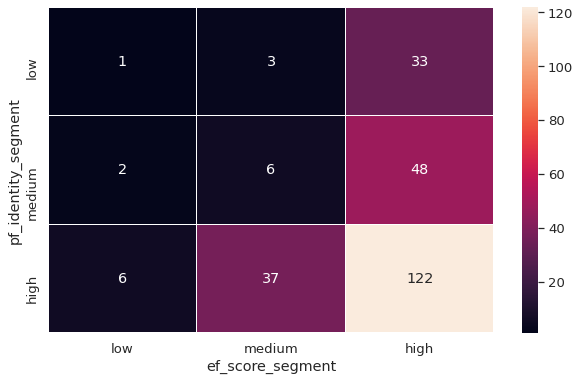

In [221]:
# Los siguientes gráficos utilizan solo los valores para la región de América Latina.
# Mapa de calor entre las variables categóricas pf_identity_segment y ef_score_segment
# INTERPRETACIÓN: cuanto más oscuro el color es (violeta oscuro), menos correlación presentan las variables
plt.figure(figsize=(10,6))
pf_id_ef = pandas.crosstab(dataset_chico.pf_identity_segment, dataset_chico.ef_score_segment, normalize = False)
seaborn.heatmap(pf_id_ef, annot=True, fmt="d", linewidths=.5)

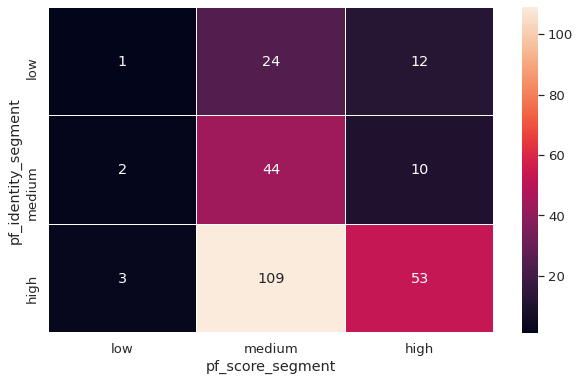

In [222]:
# Mapa de calor entre las variables categóricas pf_identity_segment y pf_score_segment
plt.figure(figsize=(10,6))
pf_pf = pandas.crosstab(dataset_chico.pf_identity_segment, dataset_chico.pf_score_segment, normalize = False)
seaborn.heatmap(pf_pf, annot=True, fmt="d", linewidths=.5)

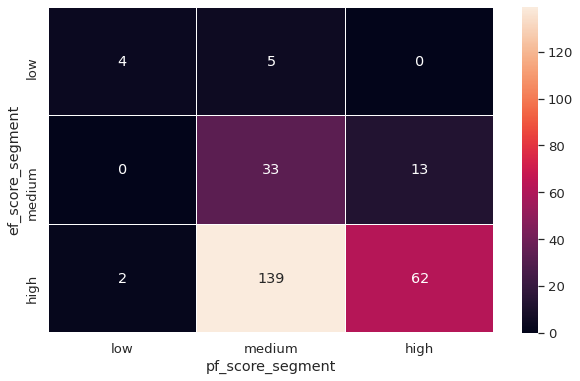

In [223]:
# Mapa de calor entre las variables categóricas ef_score_segment y pf_score_segment
plt.figure(figsize=(10,6))
ef_pf_score = pandas.crosstab(dataset_chico.ef_score_segment, dataset_chico.pf_score_segment, normalize = False)
seaborn.heatmap(ef_pf_score, annot=True, fmt="d", linewidths=.5)

OBSERVACIONES: En los gráficos del punto anterior, no se puede visualiza la tendencia de los datos porque existe superposición de los puntos, pero en el mapa de calor se muestra más claramente la concentración que indica una mayor relación entre las variables.

Se puede observar que en los segmentos medium y high de las 3 variables se concentran la mayor cantidad de coincidencias.

# Parte 2

Luego del segundo fin de semana de clase, podemos revisitar nuestro trabajo anterior y completarlo respondiendo a las siguientes preguntas:

## 3. Distribuciones

### 3.1 Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.

Si bien en un punto previo propusimos distribuciones para las  distintas variables tanto global como para LATAM y el Caribe, en este punto comparamos con una normal e introducimos parámetros distintos de media 0 y desviación 1. Cabe aclarar que visualmente obtuvimos una distribución bimodal para una variable que no es una opción a usar en esta función del test KS.

In [224]:
from scipy import stats
#Prueba KS para pf_identity en Latinoamérica (ya tiene aplicado el dropna)
stats.kstest(data_latinoamerica.pf_identity, stats.norm(data_latinoamerica.pf_identity.mean(), data_latinoamerica.pf_identity.std()).cdf)

KstestResult(statistic=0.34877089816176066, pvalue=1.4893561222947153e-28)

In [225]:
# Prueba KS para pf_identity en el mundo
stats.kstest(dataset.dropna(subset=['pf_identity']).pf_identity, stats.norm(dataset.pf_identity.mean(), dataset.pf_identity.std()).cdf)

KstestResult(statistic=0.22117579326428677, pvalue=1.2026957468430114e-66)

In [226]:
# Prueba KS para hf_score en Latinoamérica 
data_latinoamerica2 = dataset_latamYCaribe[['year','countries','pf_identity','pf_score','ef_score', "hf_score"]].dropna()
stats.kstest(data_latinoamerica2.hf_score, stats.norm(data_latinoamerica2.hf_score.mean(), data_latinoamerica2.hf_score.std()).cdf)

KstestResult(statistic=0.16812393003845902, pvalue=7.636033514162593e-07)

In [227]:
# Prueba KS para hf_score en el mundo
stats.kstest(dataset.dropna(subset=['hf_score']).pf_identity, stats.norm(dataset.hf_score.mean(), dataset.hf_score.std()).cdf)

KstestResult(statistic=0.4953792355875561, pvalue=0.0)

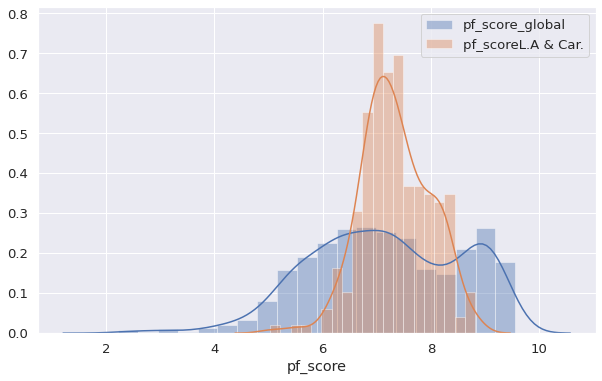

In [228]:
# Como no se había graficado anteriormente un histograma para la variable pf_score
# lo realizamos ahora con el fin de poder estimar la distribución que presenta de manera visual
plt.figure(figsize=(10,6))
seaborn.distplot(
    dataset.pf_score, label='pf_score_global', kde=True, bins=n)
seaborn.distplot( 
    dataset.pf_score[dataset.region == 'Latin America & the Caribbean'], label='pf_scoreL.A & Car.', kde=True, bins=n)
plt.legend()

In [229]:
# Prueba KS para pf_score en Latinoamérica 
stats.kstest(data_latinoamerica.pf_score, stats.norm(data_latinoamerica.pf_score.mean(), data_latinoamerica.pf_score.std()).cdf)

KstestResult(statistic=0.054270551553750046, pvalue=0.4221030427807115)

In [230]:
# Prueba KS para pf_score en el mundo
stats.kstest(dataset.dropna(subset=['pf_score']).pf_identity, stats.norm(dataset.pf_score.mean(), dataset.pf_score.std()).cdf)

KstestResult(statistic=0.41773834075940125, pvalue=5.933559248871809e-244)

In [231]:
#Prueba KS para ef_score para Latinoamérica
stats.kstest(data_latinoamerica.ef_score, stats.norm(data_latinoamerica.ef_score.mean(), data_latinoamerica.ef_score.std()).cdf)

KstestResult(statistic=0.13653982441091728, pvalue=0.00011737833201776114)

In [232]:
# Prueba KS para ef_score en el mundo
stats.kstest(dataset.dropna(subset=['ef_score']).pf_identity, stats.norm(dataset.ef_score.mean(), dataset.ef_score.std()).cdf)

KstestResult(statistic=0.5242215721739594, pvalue=0.0)

CONCLUSIÓN: Para la variable pf_score en Latinoamérica, se acepta la hipótesis nula ya que el p-valor es de 0.422 y es mayor que el nivel de significancia establecido que es 0.05 (5%).

Para las variables restantes, para el mismo nivel de significancia descripto anteriormente, como se obtuvieron valores de  p-valor cercanos a 0 rechazamos la h0 (que la distribución es normal).


## 4. Correlaciones
### 4.3 Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 


No usamos Pearson porque comprobamos mediante el test K-S que las distribuciones no son normales.

Los pares de variables elegidas son: pf_identity con pf_score y pf_identity con ef_score.

In [233]:
#Calculamos los coeficientes de Correlación de Spearman, y mostramos los resultados en una matriz. 
#Cuanto más cercano a +-1 es el valor, mayor correlación hay y cuanto más cercano a cero el valor, menor correlación entre las variables hay
important = ['pf_identity', 'ef_score']
imp_data=data_latinoamerica[important]
imp_data.corr(method="spearman")

,pf_identity,ef_score
pf_identity,1.000000,-0.128505
ef_score,-0.128505,1.000000


In [234]:
important = ['pf_identity', 'pf_score']
imp_data=data_latinoamerica[important]
imp_data.corr(method="spearman")

,pf_identity,pf_score
pf_identity,1.00000,0.19128
pf_score,0.19128,1.00000


CONCLUSIÓN: Como los coeficientes de correlación son todos cercanos a 0 (ya sea positiva o negativa), se puede decir que no existe correlación entre las variables analizadas.

### 4.4 Analizar la correlación entre la region y el pf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros). Genere nuevas variables categóricas ordinales para calcular la correlación Tau de Kendal y genere una tabla de contingencia con esas nuevas variables.

### CONSIGNA CONSIDERADA: Hacemos un test para correlación de variables categóricas en Latinoamérica (Kendall): el pf_score, el ef_score y pf_identity. Usamos otro par de variable que se pueda hacer ordinal (segmentamos) usando pandas.cut y aplicamos tablas de contigencia según la región.  


In [235]:
important = ['pf_identity', 'ef_score', 'pf_score']
imp_data=data_latinoamerica[important]
imp_data.corr(method="kendall")

,pf_identity,ef_score,pf_score
pf_identity,1.000000,-0.097871,0.151060
ef_score,-0.097871,1.000000,0.128478
pf_score,0.151060,0.128478,1.000000


In [236]:
pf_id_seg_global = pandas.cut(dataset['pf_identity'], 
                                 bins = make_bins(dataset['pf_identity']),
                                 labels = bin_labels, retbins = False)
dataset['pf_id_seg_global'] = pf_id_seg_global
pf_id_seg_global

[-0.01, 2.996, 7.004, 10.01]


0       medium
1          low
2       medium
3         high
4         high
         ...  
1615      high
1616      high
1617      high
1618      high
1619      high
Name: pf_identity, Length: 1620, dtype: category
Categories (3, object): [low < medium < high]

In [237]:
plt.figure(figsize=(10,6))
pf_id_region = pandas.crosstab(dataset.region, dataset.pf_id_seg_global, normalize = False)
pf_id_region

pf_id_seg_global,low,medium,high
region,,,
Caucasus & Central Asia,0,7,51
East Asia,0,0,60
Eastern Europe,0,3,209
Latin America & the Caribbean,0,65,193
Middle East & North Africa,122,28,19
North America,0,0,20
Oceania,0,1,39
South Asia,46,46,61
Sub-Saharan Africa,62,190,138


<Figure size 720x432 with 0 Axes>

In [238]:
pf_score_seg_global = pandas.cut(dataset['pf_score'], 
                                 bins = make_bins(dataset['pf_score']),
                                 labels = bin_labels, retbins = False)
dataset['pf_score_seg_global'] = pf_score_seg_global
pf_score_seg_global

[2.2100000000000004, 4.418, 7.362, 9.57]


0         high
1       medium
2       medium
3         high
4       medium
         ...  
1615      high
1616      high
1617      high
1618      high
1619      high
Name: pf_score, Length: 1620, dtype: category
Categories (3, object): [low < medium < high]

In [239]:
plt.figure(figsize=(10,6))
pf_score_region = pandas.crosstab(dataset.region, dataset.pf_score_seg_global, normalize = False)
pf_score_region

pf_score_seg_global,low,medium,high
region,,,
Caucasus & Central Asia,0,48,10
East Asia,0,10,50
Eastern Europe,0,21,191
Latin America & the Caribbean,0,143,115
Middle East & North Africa,31,127,11
North America,0,0,20
Oceania,0,13,27
South Asia,0,133,20
Sub-Saharan Africa,3,341,46


<Figure size 720x432 with 0 Axes>

CONCLUSIÓN: Como dijimos anteriormente, Latinoamérica no posee correlación. Sin embargo, si lo comparamos a nivel global podemos observar que Latinoamérica posee mayor libertad personal respecto a otras regiones.

### Además de completar estos puntos faltantes, luego de haber visitado los conceptos de percepción visual y comunicación efectiva, están en condiciones de reveer los gráficos realizados y evaluar si pueden ser mejorados. Para ello, puede hacerse las siguientes preguntas:

### * ¿Están utilizando el tipo de gráfico adecuado para cada tipo de variable?
### * Los gráficos, ¿son legibles?
### * Los gráficos generados, ¿responden a las preguntas mostrando un patrón claro? En caso de que no, ¿podemos filtrar los datos para que el patrón sea más evidente? ¿o agruparlos de manera distinta? ¿o cambiar el tipo de gráfico?

CONSIDERACIONES VISUALES: Para cada tipo de variable utilizamos el tipo de gráfico que consideramos más adecuado, por ejemplo; gráfico de líneas para variación en el tiempo, gráfico de puntos para dispersión de valores, gráfico de barras para frecuencia de valores o para distinguir por la longitud (no por el ancho), gráfico de cajas para evaluar intervalos.

Para los gráficos tuvimos en cuenta los aspectos vistos en la clase de visualización: títulos, descripción de ejes, orientación de los nombres de las variables, escalas compartidas para gráficos que se tienen que comparar entre ellos, colores para las distintas variables en un mismo gráfico, referencia de color por variable, colores distinguibles entre sí y con tonos suaves. Para gráficos con muchos datos amontonados en una misma zona, agrandamos el tamaño como solución ya que era necesario colocarlos en el mismo gráfico. 
Finalmente consideramos que sí son legibles.

CONCLUSIONES FINALES:
Como respuesta a las preguntas guía:

1. ¿Qué significa tener un puntaje de 4.5? 
Según los estadísticos obtenidos a nivel global, para países con valores de 4.5 se puede decir que se encuentran por debajo de la media global.
Por otro lado, LATAM se encuentra por encima de la media a nivel global. 
 
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
Se puede decir que la tendencia a través de los años va en descenso desde 2015. Se puede considerar como un punto de partida para análisis posteriores con la pregunta: ¿Qué sucedió en la región en ese año que afectó a las libertades?

3. En este estudio, la libertad se mide con un estimador principal: *hf_score* que hace referencia a Human Freedom, que a su vez está calculado en base a dos otros estimadores *ef_score*, para Economic Freedom y *pf_score*, para Personal Freedom. Estos tres estimadores, ¿se relacionan de la misma manera con la libertad de identidad?
Como se vio en los puntos de análisis de correlación, entre estas variables no se presenta una correlación significativa 

Finalmente, podemos responder la pregunta general del estudio: ¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?

A grandes rasgos podemos decir que LATAM se encuentra en un nivel medio-alto en cuanto a niveles de libertad respecto del resto del mundo pero esto no quiere decir que toda la region se encuentre en ese estado. Existe una diferencia muy marcada entre los niveles de libertad entre los paises de la región. En relación a esto, encontramos un estudio realizado por la fundacion FAES, que analizando el mismo dataset, y agregandole un marco político, llegaron a conclusiones similares a las nuestras, las cuales citamos a continuación: "América Latina arrastra graves problemas de naturaleza social y económica, y se enfrenta a retos formidables en un mundo marcado
por la competición entre países y regiones. A problemas y retos sociales y económicos hay que responder con iniciativas dirigidas a la
sociedad y a la economía. Pero la llave es la política, que debe encontrar y administrar las soluciones adecuadas." (América Latina, Una agneda de la libertad de FAES https://fundacionfaes.org/file_upload/publication/pdf/20130425154454america-latina-una-agenda-de-libertad.pdf). 